In [2]:
cd Downloads

C:\Users\hp\Downloads


In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import PIL as Images
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [4]:
data = np.load("imag.pix.npy")
y = np.load("imag.lbl.npy")
print(data.shape)
print(y)

(87, 132342)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


132342


TypeError: Invalid dimensions for image data

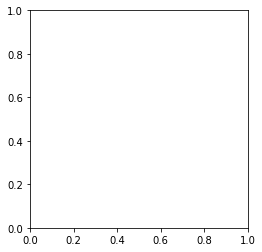

In [9]:
print(data[5].shape[0])
plt.imshow(data[5])
plt.xticks([])  
plt.yticks([])
STANDARD_SIZE = (322, 137)
mat = data[5]

In [7]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    g,b,r = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
  
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

[[[231 205 224]
  [231 205 224]
  [228 202 221]
  ...
  [238 218 235]
  [233 213 230]
  [232 212 229]]

 [[231 205 224]
  [231 205 224]
  [228 202 221]
  ...
  [238 218 235]
  [233 213 230]
  [232 212 229]]

 [[232 206 225]
  [232 206 225]
  [229 203 222]
  ...
  [239 219 236]
  [235 215 232]
  [233 213 230]]

 ...

 [[242 212 229]
  [242 212 229]
  [249 219 236]
  ...
  [239 218 231]
  [236 215 228]
  [232 211 224]]

 [[249 213 234]
  [249 213 234]
  [255 221 242]
  ...
  [245 219 233]
  [244 218 232]
  [244 218 232]]

 [[248 209 232]
  [248 209 232]
  [255 216 239]
  ...
  [242 213 229]
  [242 213 229]
  [243 214 230]]]


([], <a list of 0 Text yticklabel objects>)

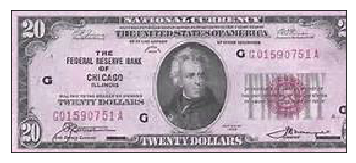

In [170]:
size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
mat = data[43]
r,g,b = mat[0:size:3], mat[1:size:3], mat[2:size:3]
rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0],3),'uint8')
rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
print(rgbArray)
plt.imshow(rgbArray)
plt.xticks([])  
plt.yticks([])

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components =60)
X = pca.fit_transform(data)
print(X.shape[0])
print(X)

87
[[-2.25363626e+04 -2.42834376e+03 -2.13377484e+03 ...  4.62740618e+01
  -1.83636481e+02  7.58584057e+01]
 [-2.22266587e+04 -7.09255546e+02 -2.88824110e+02 ...  2.44438897e+02
   8.49134661e+01  3.44369691e+02]
 [-1.73642608e+04 -4.25202694e+03  7.93797040e+02 ... -4.89742790e+02
  -1.33419146e+03 -5.52796849e+02]
 ...
 [ 1.24430482e+04 -3.41227767e+03  7.42225250e+00 ...  7.38217525e+02
  -2.34580279e+02  4.10204614e+02]
 [ 1.16549277e+04 -2.37596693e+03 -4.58184877e+03 ...  4.66785396e+03
   2.12324728e+02  1.22798035e+03]
 [ 5.84668690e+03 -1.73120730e+03 -3.69687457e+03 ... -9.71363412e+02
  -7.51073159e+02  4.09871701e+03]]


In [85]:
print(pca.explained_variance_ratio_.sum())

0.9424833375531854


In [54]:
pca.explained_variance_ratio_*100
print(pca.explained_variance_ratio_.shape[0])
pca.components_.shape[1]


60


132342

In [51]:
df =pd.DataFrame({"y":y,"label":np.where(y==1,"check","dollars")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]


In [45]:
df.head()

,y,label,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
0,1,check,-22536.362571,-2428.343944,-2133.778192,-328.314972,-1065.248837,79.792944,-425.010676,622.511689,...,-421.487689,-227.265012,340.639342,83.316849,-124.129555,-280.128313,-588.909916,-102.304091,-40.995193,-546.569329
1,1,check,-22226.658684,-709.255837,-288.826832,-1300.631409,-792.084647,217.428467,1076.834429,-2115.132632,...,-429.673515,90.867394,143.551332,-480.520569,527.347342,-386.919155,-506.427378,96.212548,-2.528210,-200.799281
2,1,check,-17364.260784,-4252.026740,793.800264,-1362.055275,-374.239314,3142.088944,2514.196712,1443.822045,...,-1932.551526,1741.641677,1491.252305,2147.434261,-769.444018,-2879.789247,-1132.504741,-830.214705,-841.558248,-207.680740
3,1,check,-22847.256199,-900.592768,577.201955,-180.250072,-733.245123,-107.870570,1441.824707,-1069.524918,...,845.684620,-401.904277,-119.867030,172.546130,39.756802,1705.069281,265.914348,-286.164325,694.673117,-448.882327
4,1,check,-15868.672595,3259.491623,506.798793,-919.608359,2166.487087,-981.634565,-1669.703816,-391.279706,...,-334.663638,2117.050143,449.355972,-922.130076,2892.456583,1922.018351,2210.774025,-1595.752792,-2308.147931,2214.764352


In [84]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
print(pca.components_)
print(data.shape)
print(X.shape)

[[-0.00137942 -0.00164105 -0.00188562 ... -0.00164061 -0.00181242
  -0.00208118]
 [-0.00936683 -0.00896847 -0.00771694 ... -0.00910723 -0.00876363
  -0.0080063 ]
 [-0.00016054 -0.00011412 -0.00049584 ... -0.00074514 -0.00091884
  -0.00120924]
 ...
 [ 0.00131864 -0.00020495 -0.00016799 ...  0.00091286 -0.00123866
  -0.00169423]
 [-0.00246539 -0.00250182 -0.00431071 ... -0.00096849 -0.00147883
  -0.00187336]
 [-0.00051706 -0.00035882 -0.00088558 ...  0.00163831  0.00139888
  -0.0011393 ]]
(87, 132342)
(87, 60)


([], <a list of 0 Text yticklabel objects>)

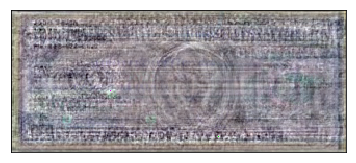

In [71]:
size = 322*137*3
r =pca.components_[59][0:size:3]
g =pca.components_[59][1:size:3]
b =pca.components_[59][2:size:3]
r=normit(r)
g=normit(g)
b=normit(b)
rgbArray = np.zeros((137,322,3),'uint8')
rgbArray[...,0] = r.reshape(137,322)
rgbArray[...,1] = g.reshape(137,322)
rgbArray[...,2] = b.reshape(137,322)
plt.imshow(rgbArray)
plt.xticks([])
plt.yticks([])

In [164]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split 
def classify(X,y, nbrs):
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size = 0.6)
    clf = KNeighborsClassifier(nbrs)
    clf = clf.fit(Xtrain,ytrain)
    train_accuracy = clf.score(Xtrain,ytrain)
    test_accuracy = clf.score(Xtest,ytest)
    Xall = np.concatenate((Xtrain,Xtest))
    return train_accuracy, test_accuracy 


In [165]:

classifye(Xs,ys,50)

(50, 0.6153846153846154, 0.5428571428571428)

In [166]:
print(y)
ys = df['y'].astype(int).values

subdf = df[['pc1','pc2']]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [167]:
subdfstd=(subdf - subdf.mean())/subdf.std()

xs = subdfstd.values
print(xs.shape)

(87, 2)


In [169]:


classify( xs,ys,1)
classify(xs,ys,10)

(0.9615384615384616, 0.9428571428571428)

In [171]:
#gridCV code 
def cvoptimize(clf,parameters,Xtrain,ytrain,n_folds= 5):
    gs =GridSearchCV(clf,param_grid = parameters,cv = n_folds)
    gs.fit(Xtrain,ytrain)
    print("best params", gs.best_params_)
    best = gs.best_estimator_
    return best
    
   


In [ ]:
from sklearn.cross_validation import train_test_split 
def do_classify(clf,parameters,indf,features,target,target1val,standardsize=False, train_size = 0.8 ):
    